<a href="https://colab.research.google.com/github/g-twombly/FSRI-Research/blob/master/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install rebound
%pip install reboundx

     |████████████████████████████████| 245kB 2.7MB/s 
  Created wheel for rebound: filename=rebound-3.12.2-cp36-cp36m-linux_x86_64.whl size=561627 sha256=4ff5cf497ba80ae4a51a6fbbbcf48e414c47c61b8fc78838f09ede3238e758d6
  Stored in directory: /root/.cache/pip/wheels/e7/c5/a8/af7b610100ff48c07ea083aec02daca70488e435edca2f0b74
Successfully built rebound
     |████████████████████████████████| 81kB 2.1MB/s 
  Created wheel for reboundx: filename=reboundx-3.1.0-cp36-cp36m-linux_x86_64.whl size=187734 sha256=6dd36a7d0493c2c72df8b62456862026a5faec07a1ce0c0ca59f1527b28b682a
  Stored in directory: /root/.cache/pip/wheels/fa/53/38/44dc898d6d8267c97ad4b22389d52d051b8a1e6e17082fcc63
Successfully built reboundx


In [ ]:
#to integrate: sim.integrate(time) when time is how long you want to integrate to

import rebound
import numpy as np
sim = rebound.Simulation()
sim.add(m=0.684)
sim.add(m=5.15e-5, e=0.22, P=(4.066499 / (365.25 / (2 * np.pi))), inc=1.5355 - np.pi / 2., M=2458658.74627 , Omega=0, omega=0)
sim.add(m=0.000929196, e=0.047, P=(8.350381 / (365.25/(2 * np.pi))), inc=1.5259 - np.pi / 2., M=2458657.90461, Omega=0, omega=-0.4887)
# to integrate: sim.integrate(time) when time is how long you want to integrate to

In [ ]:
%matplotlib inline
#fig, ax = rebound.OrbitPlot(sim)
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
sim.move_to_com()
for i in range(15):
    sim.integrate(sim.t+0.31)
    fig, ax = rebound.OrbitPlot(sim, fancy=True, color=True, lw=2, unitlabel="[AU]",xlim=[-0.08,0.08],ylim=[-0.08,0.08])
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

plt.savefig("sim1.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

In [ ]:
import reboundx
# need to re-create the simulation once you run it:
sim = rebound.Simulation()
sim.add(m=0.684)
sim.add(m=5.15e-5, e=0.22, P=(4.066499 / (365.25 / (2 * np.pi))), inc=1.5355 - np.pi / 2., M=np.true_divide(2458658.74627 , 4.066499) / 4.066499  *2* np.pi , Omega=0, omega=0)
outer_period = 4.066499 * 2.08 # the second planet should start outside the 2:1 resonance 
sim.add(m=0.000929196, e=0.047, P=(outer_period/ (365.25/(2 * np.pi))), inc=1.5259 - np.pi / 2., M=np.true_divide(2458657.90461, outer_period ) / outer_period  * 2*np.pi, Omega=0, omega=0)
# I changed the initial orbital periods for the planets 

rebx = reboundx.Extras(sim)
mof = rebx.load_force("modify_orbits_forces")
rebx.add_force(mof)

In [ ]:
tmax = 5.e4
ps = sim.particles
# if you set tau_a to np.Infinity, planet will only move if the outer planet "pushes" it inwards once it's trapped in the resonance
ps[1].params["tau_a"] = -tmax * 8
ps[2].params["tau_a"] = -tmax * 5 # more massive planets will migrate more quickly in the disk, so make this timescale shorter

In [ ]:
sim.move_to_com()
Nout = 50000
torb = 2.*np.pi
phi = np.zeros(Nout)
a1,a2 = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0.,tmax,Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    a1[i] = ps[1].a
    a2[i] = ps[2].a
    # make sure to create an array for storing the resonance angle
    phi[i] = (2 * ps[2].l - ps[1].l - ps[1].pomega)%(2.*np.pi)
    #print(i)

In [ ]:
#fig = plt.figure(figsize=(5,5))
#ax = plt.subplot(111)
#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-1.5,1.5])
#plt.scatter(a1, a1, marker='.', color='k', s=1.2);
#plt.scatter(a2, a2, marker='.', color='k', s=1.2);

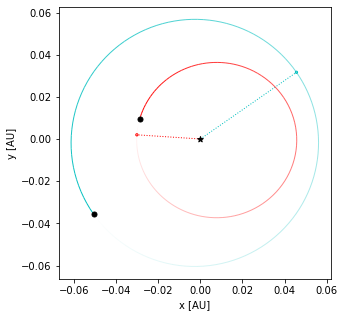

In [ ]:
import rebound
os = sim.calculate_orbits()
sim.move_to_com()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)

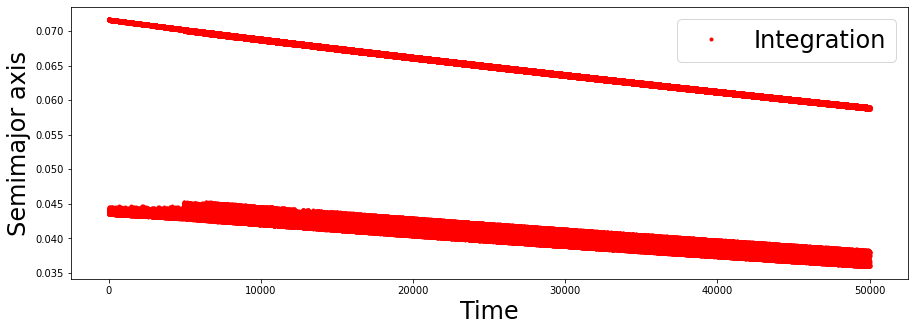

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ainner = (4.066499 / (365.25 / (2 * np.pi)))**(2/3)
aouter = (8.350381 / (365.25/(2 * np.pi)))**(2/3)
#a1pred = [ainner*np.e**(t/ps[1].params["tau_a"]) for t in times]
#a2pred = [aouter*np.e**(t/ps[2].params["tau_a"]) for t in times]


fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
#ax.set_yscale('log')
ax.plot(times,a1, 'r.',  label='Integration')
ax.plot(times,a2, 'r.')
#ax.plot(times,a1pred, 'k--',label='Prediction') don't want to plot this anymore
# only plot the numerical results
#ax.plot(times,a2pred, 'k--')
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Semimajor axis", fontsize=24)
ax.legend(fontsize=24)

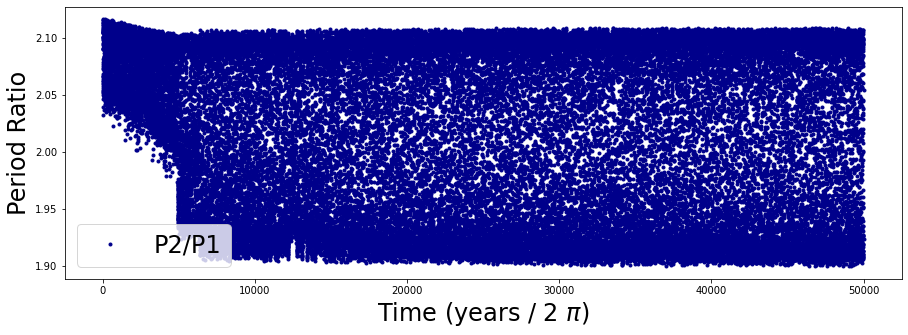

In [ ]:
# The period ratio should be close to 2:1 for the planets to be in resonance: 
# check that with this plot. It's okay if it's bouncing around 2 a little bit, but it should remain at roughly that level. 

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
#ax.set_yscale('log')
ax.plot(times,np.power(a2 / a1, 3/2.), '.',color='DarkBlue',  label='P2/P1')
ax.set_xlabel("Time (years / 2 $\pi$)", fontsize=24)
ax.set_ylabel("Period Ratio", fontsize=24)
ax.legend(fontsize=24)

(-1.0, 7.0)

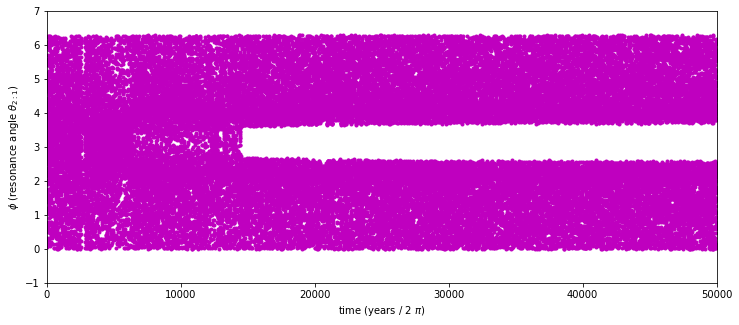

In [ ]:
#resonance plot
phi[i] = (2 * ps[2].l - ps[1].l - ps[1].pomega)%2.*np.pi

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.plot(times,phi,".",color="m",label="Angle")
ax.set_xlabel("time (years / 2 $\pi$)")
ax.set_ylabel(r"$\phi$ (resonance angle $\theta_{2:1}$)")
ax.set_xlim([0,50000])
ax.set_ylim([-1,7])
